# Mutagenèse
Dans ces expériences, un génome aléatoire est généré en respectant ou non les hypothèses suivantes :
- le génome est homogène (tous les segments non codants ont la même longueur)
- le génome est unidirectionnel

A chaque itération, on applique une mutation donnée, on vérifie sa neutralité et on détermine ses caractéristiques (longueur par exemple).
Cela se fait pour diverses valeurs de $g$, $z_c$ et $z_{nc}$

Sur les graphiques, les barres autour des points représentent la variance de l'estimateur qui est la variance de l'échantillon sur la taille de l'échantillon $\left(\frac{\sigma²}{n}\right)$.

## Imports, objets et fonctions

In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
class Results:
    def __init__(self):
        self.x_values = []

        self.neutral_proportions = []
        self.neutral_proportiond_stds = []

        self.theoretical_proportions = []

        self.length_means = []
        self.length_means_stds = []
        
        self.theoretical_lengths = []
    
    def load_results(self, folder):
        d_results = {}
        for exposant in range(1, 8):
            with open(f"{folder}_{exposant}.json") as json_file:
                d_results[exposant] = json.load(json_file)

        self.x_values = []

        self.neutral_proportions = []
        self.neutral_proportiond_stds = []

        self.theoretical_proportions = []

        self.length_means = []
        self.length_means_stds = []
        
        self.theoretical_lengths = []

        for exposant, results in d_results.items():
            self.x_values.append(float(f"1e{exposant}"))
            self.neutral_proportions.append(results["Neutral mutations proportion"])
            self.neutral_proportiond_stds.append(results["Neutral mutations standard deviation of proportion estimator"])

            self.theoretical_proportions.append(results["Neutral probability theory"])

            self.length_means.append(results["Length mean"])
            self.length_means_stds.append(results["Length standard deviation of mean estimator"])
            
            self.theoretical_lengths.append(results["Length mean theory"])
            
results = Results()

## $g$ variable, rapports $\frac{g}{z_c}$ et $\frac{g}{z_{nc}}$ constants (égaux à 1000)
### Génome homogène et unidirectionnel

In [3]:
results_path = "results/model_g"

#### Mutations ponctuelles

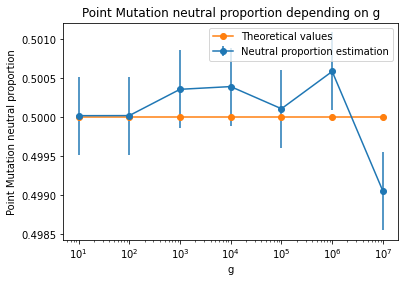

In [4]:
results.load_results(f"{results_path}/Point Mutation/g")

plt.clf()

plt.errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

plt.title(f"Point Mutation neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Point Mutation neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de mutations ponctuelles neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5.

#### Petites Insertions

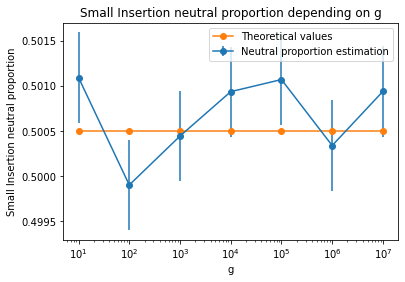

In [5]:
results.load_results(f"{results_path}/Small Insertion/g")

plt.clf()

plt.errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

plt.title(f"Small Insertion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de petites insertions neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5005.

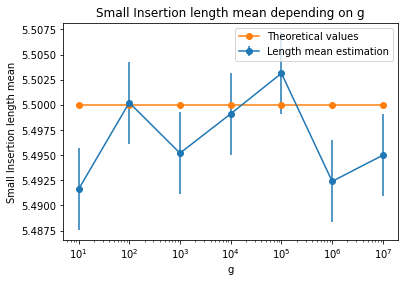

In [6]:
plt.clf()

plt.errorbar(results.x_values, results.length_means, results.length_means_stds, marker='o', label="Length mean estimation")
plt.plot(results.x_values, results.theoretical_lengths, marker='o', label="Theoretical values") 

plt.title(f"Small Insertion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

Les longueurs moyennes des mutations sont conformes au modèle, indépendantes de $g$ et égales à 5,5

#### Petites Délétions

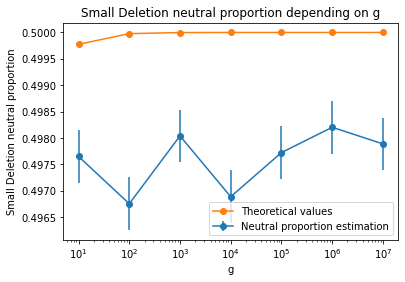

In [7]:
results.load_results(f"{results_path}/Small Deletion/g")

plt.clf()

plt.errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

plt.title(f"Small Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

ATTENTION : On observe un biais. L'implémentation est à vérifier.

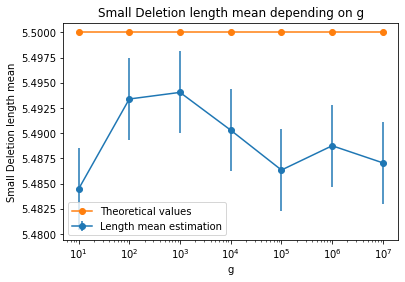

In [8]:
plt.clf()

plt.errorbar(results.x_values, results.length_means, results.length_means_stds, marker='o', label="Length mean estimation")
plt.plot(results.x_values, results.theoretical_lengths, marker='o', label="Theoretical values") 

plt.title(f"Small Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

ATTENTION : le modèle ne donne pas les longueurs moyennes théoriques des petites délétions. 

#### Duplications

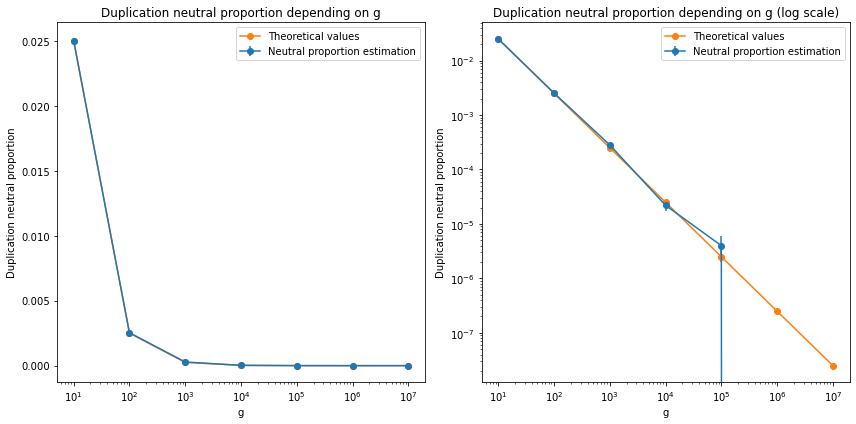

In [9]:
results.load_results(f"{results_path}/Duplication/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

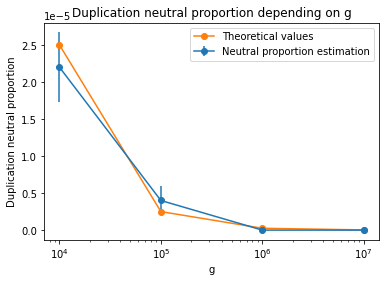

In [10]:
cut = 3
plt.clf()

plt.errorbar(results.x_values[cut:], results.neutral_proportions[cut:], results.neutral_proportiond_stds[cut:], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[cut:], results.theoretical_proportions[cut:], marker='o', label="Theoretical values") 

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

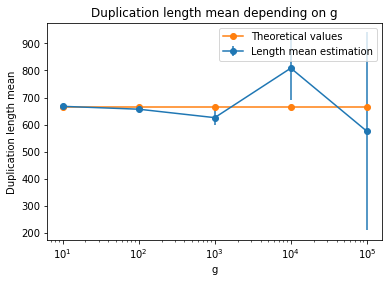

In [11]:
cut = -2 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Deletions

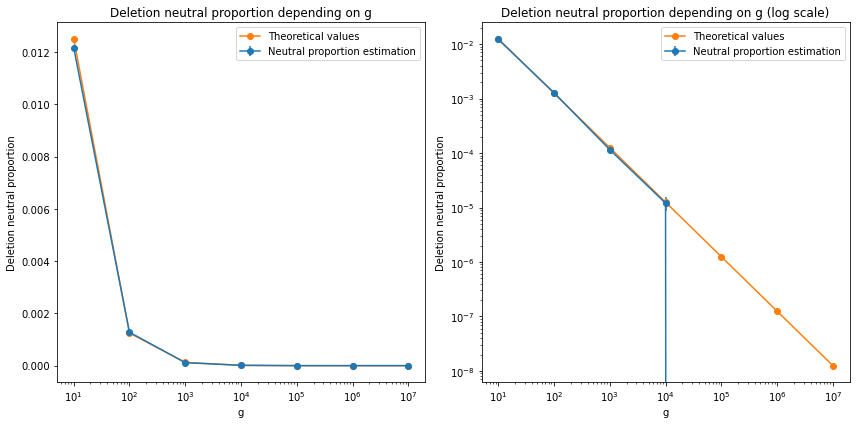

In [12]:
results.load_results(f"{results_path}/Deletion/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Deletion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Deletion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

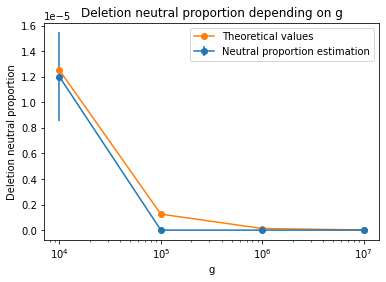

In [13]:
cut = 3
plt.clf()

plt.errorbar(results.x_values[cut:], results.neutral_proportions[cut:], results.neutral_proportiond_stds[cut:], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[cut:], results.theoretical_proportions[cut:], marker='o', label="Theoretical values") 

plt.title(f"Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

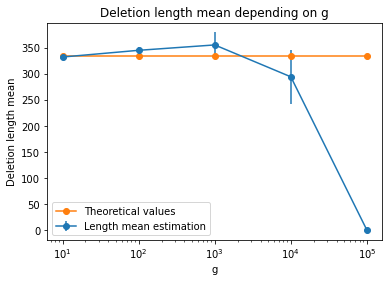

In [14]:
cut = -2 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Inversions

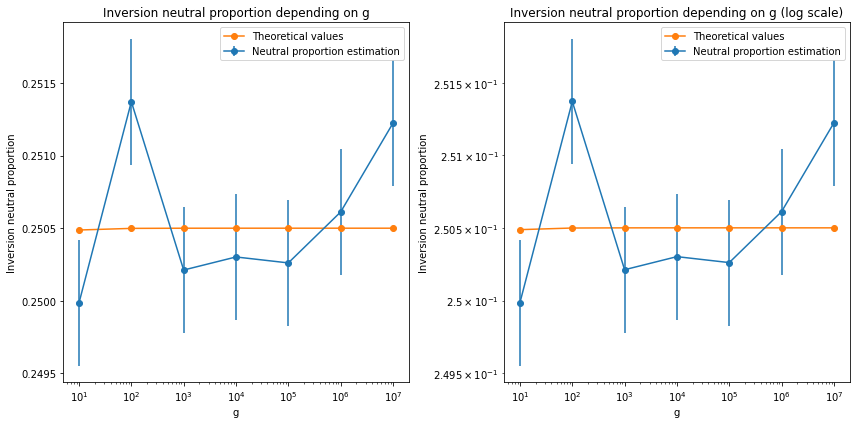

In [15]:
results.load_results(f"{results_path}/Inversion/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Inversion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Inversion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

Les observations sont conformes au modèles.

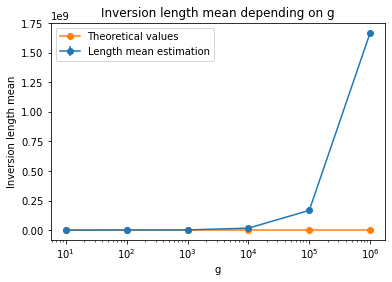

In [16]:
cut = -1 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Inversion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

ATTENTION : pas de formules théorique pour le moment.

### Génome non homogène mais unidirectionnel

In [17]:
results_path = "results/non_homogene_g"

#### Mutations ponctuelles
La proportion de bases non codante est le seul déterminant de la proportion de la neutralité des mutations ponctuelles. L'homogénéité du génome n'affecte pas cette proportion, donc les conclusions sur les mutations ponctuelles restent inchangées.
#### Petites Insertions
De la même manière, l'hétérogénéité du génome n'affecte pas les petites insertions car leur seul déterminant de proportion de neutralité sont les positions d'insertions. Les longueurs sont également non affectées.
#### Petites Délétions

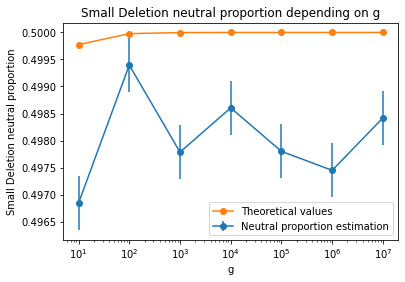

In [18]:
results.load_results(f"{results_path}/Small Deletion/g")

plt.clf()

plt.errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

plt.title(f"Small Deletion neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

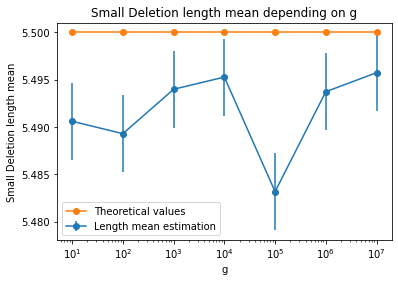

In [19]:
plt.clf()

plt.errorbar(results.x_values, results.length_means, results.length_means_stds, marker='o', label="Length mean estimation")
plt.plot(results.x_values, results.theoretical_lengths, marker='o', label="Theoretical values") 

plt.title(f"Small Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

#### Duplications

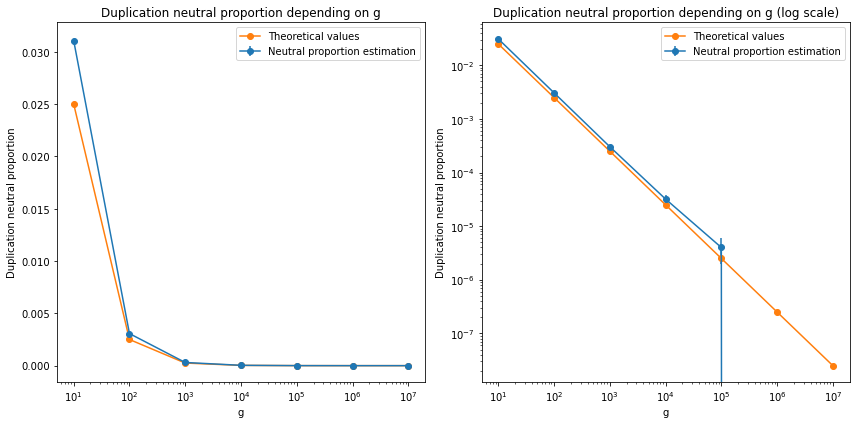

In [20]:
results.load_results(f"{results_path}/Duplication/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

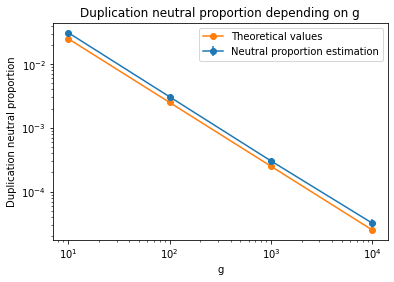

In [21]:
cut = -3
plt.clf()

plt.errorbar(results.x_values[:cut], results.neutral_proportions[:cut], results.neutral_proportiond_stds[:cut], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[:cut], results.theoretical_proportions[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un léger biais négatif du modèle pour la proportion de duplications neutres en cas de génome non homogène.

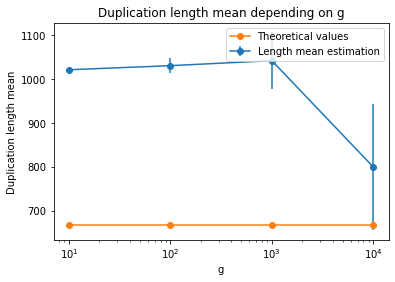

In [22]:
cut = -3 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle plutôt prononcé sur la longueur des duplications neutres avec une longueur un peu en dessous de 1000 bp (pour rappel : $z_c = z_{nc} = 1000g$)

#### Deletions

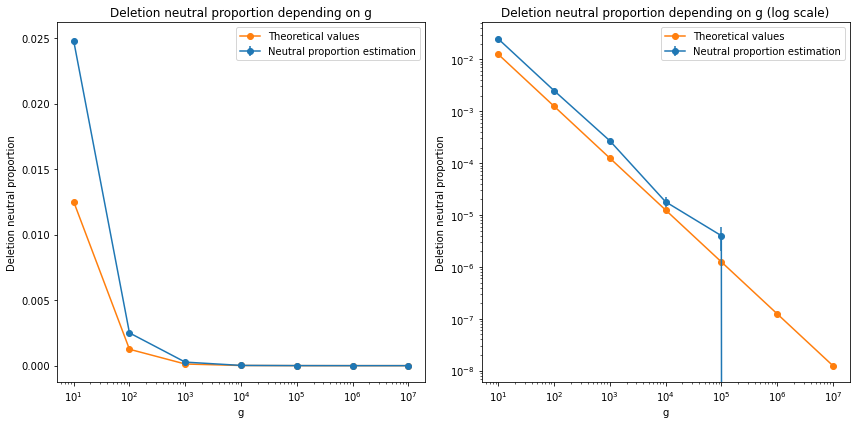

In [23]:
results.load_results(f"{results_path}/Deletion/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Deletion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Deletion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

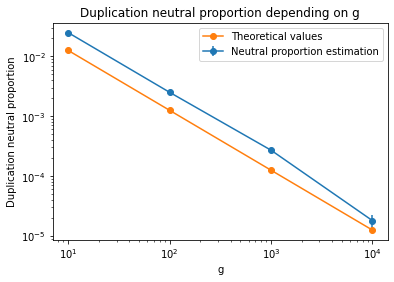

In [24]:
cut = -3
plt.clf()

plt.errorbar(results.x_values[:cut], results.neutral_proportions[:cut], results.neutral_proportiond_stds[:cut], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[:cut], results.theoretical_proportions[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

Le modèle mathématique présente un biais négatif pour la proportion de délétions neutres.

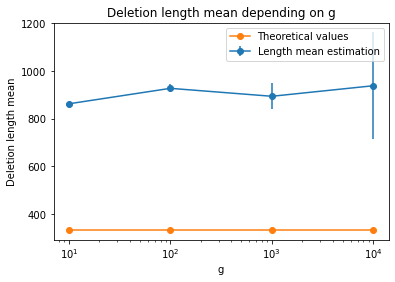

In [25]:
cut = -3 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Deletion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

Le modèle présente un biais important sur la longueur moyenne des délétions neutres.

#### Inversions
La proportion d'inversion neutre ne devrait pas être affectée par l'hétérogénéité du génome car les deux points de cassure sont considérés indépendants l'un de l'autre (mis à part le fait qu'ils sont différents). En revanche les longueurs moyennes peuvent être affectées.

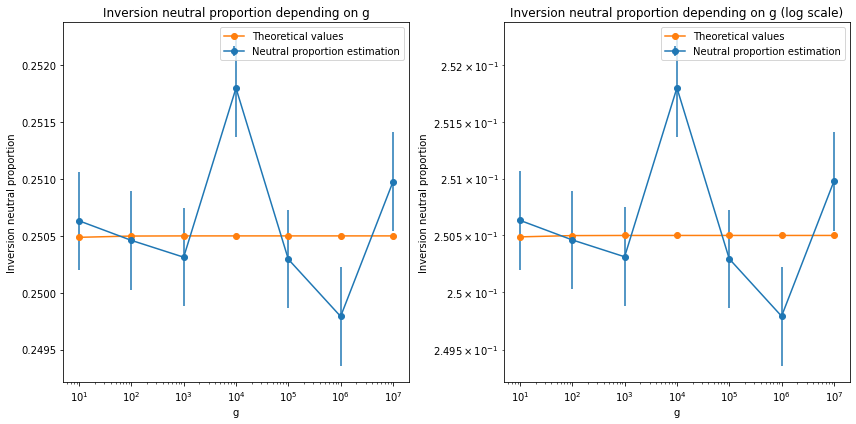

In [26]:
results.load_results(f"{results_path}/Inversion/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Inversion neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Inversion neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

L'hypothèse d'homogénéité du génome n'affecte pas la proportion d'inversions neutres.

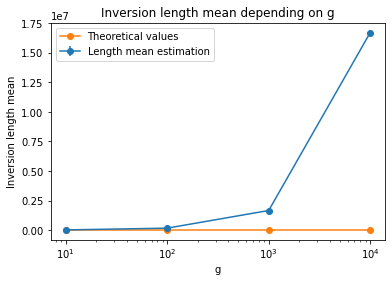

In [27]:
cut = -3 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Inversion length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

ATTENTION : pas de formule théorique pour le moment

### Génome homogène et pluridirectionnel

In [28]:
results_path = "results/pluri_d_g"

#### Point Mutations
Les mutations ponctuelles ne sont pas affectées par l'orientation des gènes.
#### Small Insertions 
Les petites insertions ne sont pas affectées par l'orientation des gènes.
#### Small Deletions
Les petites délétions ne sont pas affectées par l'orientation des gènes.
#### Duplications

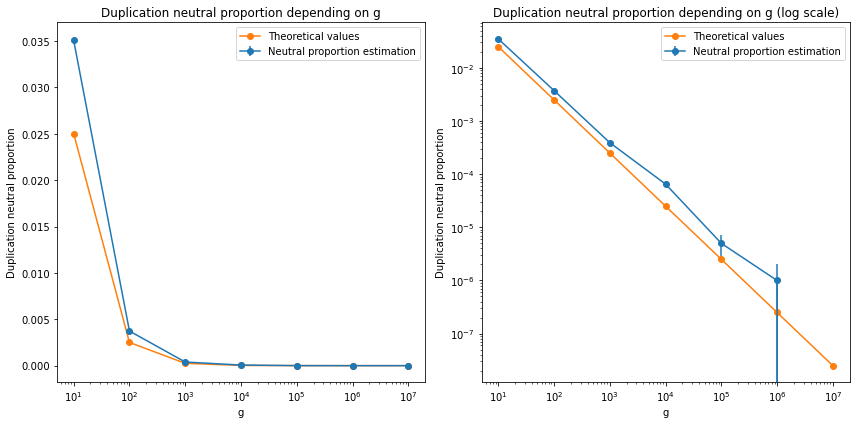

In [29]:
results.load_results(f"{results_path}/Duplication/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

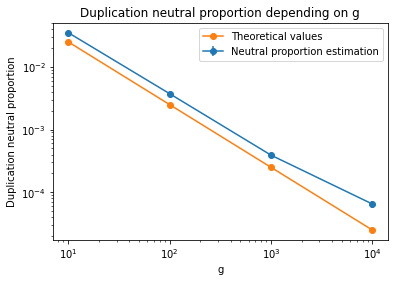

In [30]:
cut = -3
plt.clf()

plt.errorbar(results.x_values[:cut], results.neutral_proportions[:cut], results.neutral_proportiond_stds[:cut], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[:cut], results.theoretical_proportions[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle pour la proportion de duplications neutres pour un génome pluridirectionnel. 

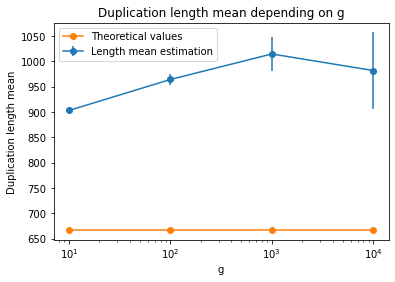

In [31]:
cut = -3 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle pour la longueur des duplications pour un génome pluri directionnel.
#### Deletions
Les délétions ne sont pas affectées par l'orientation des gènes.

#### Inversions
Les inversions modifient l'orientation des gènes mais ne sont pas affectées par cette dernières.

### Génome non homogène et pluri directionnel

In [32]:
results_path = "results/g"

#### Point Mutations
Les mutations ponctuelles ne sont affectées ni par l'homogénéité ou non du génome ni par l'orientation des gènes.
#### Small Insertions
Les petites insertions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
#### Small Deletions
Les petites délétions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
#### Duplications

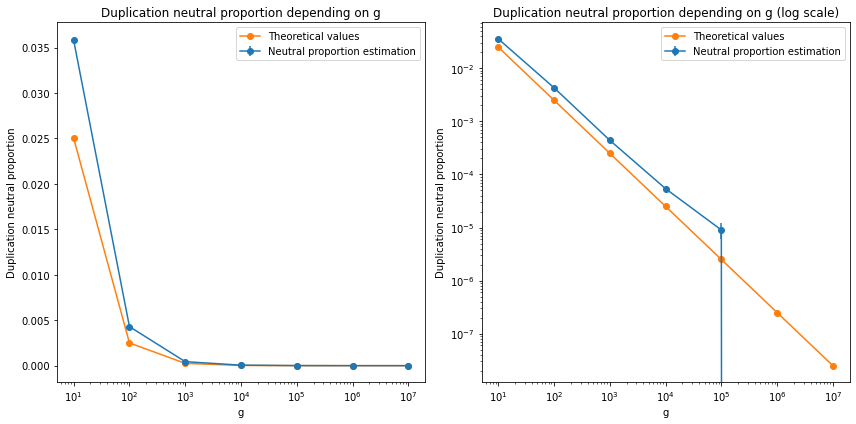

In [33]:
results.load_results(f"{results_path}/Duplication/g")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[0].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[0].set_title(f"Duplication neutral proportion depending on g")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].errorbar(results.x_values, results.neutral_proportions, results.neutral_proportiond_stds, marker='o', label="Neutral proportion estimation")
axs[1].plot(results.x_values, results.theoretical_proportions, marker='o', label="Theoretical values") 

axs[1].set_title(f"Duplication neutral proportion depending on g (log scale)")

axs[1].set_xlabel("g")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

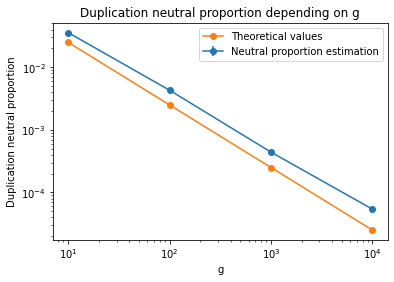

In [34]:
cut = -3
plt.clf()

plt.errorbar(results.x_values[:cut], results.neutral_proportions[:cut], results.neutral_proportiond_stds[:cut], marker='o', label="Neutral proportion estimation")
plt.plot(results.x_values[:cut], results.theoretical_proportions[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication neutral proportion depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle.

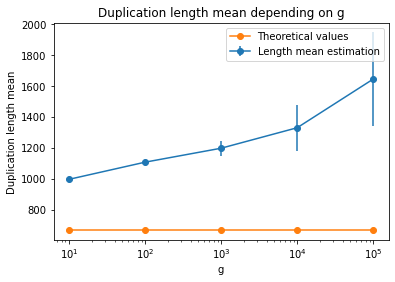

In [35]:
cut = -2 # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.errorbar(results.x_values[:cut], results.length_means[:cut], results.length_means_stds[:cut], marker='o', label="Length mean estimation")
plt.plot(results.x_values[:cut], results.theoretical_lengths[:cut], marker='o', label="Theoretical values") 

plt.title(f"Duplication length mean depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

On observe un biais négatif du modèle mathématique pour la longueur moyenne des dupplications.
#### Deletions
Les délétions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
#### Inversions
Les inversions ne sont pas affectées par l'orientation des gènes. Ce cas revient donc au cas du génome non homogène unidirectionnel.
### Conclusion sur les hypothèse pour des rapports $\frac{z_c}{g}$ et $\frac{z_{nc}}{g}$ constants


Les hypothèses d'homogénéité et d'unidirectionnalité du génome introduisent un biais négatif sur la proportion de mutation neutre et sur leur longueur moyenne.